In [1]:
import acquire as a
import prepare as p
import wrangle as w
import explore as e
import model as m
import evaluate as eval

import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import display, HTML


from sklearn.preprocessing import MinMaxScaler, RobustScaler

https://pen.do/support/difference-between-property-and-unit/

# Acquire

In [2]:
#Acquire data from SQL using my function

In [3]:
sql_query = '''
SELECT  parcelid, bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, 
taxvaluedollarcnt, fips, taxamount 
FROM properties_2017
JOIN predictions_2017 as pred USING (parcelid)
WHERE pred.transactiondate >= '2017-05-01' AND pred.transactiondate <= '2017-08-31'
AND (propertylandusetypeid > 259 AND propertylandusetypeid  < 265);
'''

In [4]:
df= a.get_data_from_sql('zillow',sql_query)

In [5]:
#check my df
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips,taxamount
0,11721753,3.0,2.0,1316.0,205123.0,6037.0,2627.48
1,11289917,3.0,2.0,1458.0,136104.0,6037.0,2319.90
2,11705026,2.0,1.0,1421.0,35606.0,6037.0,543.69
3,14269464,4.0,3.0,2541.0,880456.0,6059.0,9819.72
4,11446756,3.0,2.0,1491.0,107110.0,6037.0,1399.27


In [6]:
df.shape

(28185, 7)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,28185.0,1.304103e+07,3.744921e+06,10711855.00,1.151082e+07,12593855.0,1.414899e+07,1.676878e+08
bedroomcnt,28185.0,3.307007e+00,9.500449e-01,0.00,3.000000e+00,3.0,4.000000e+00,1.200000e+01
bathroomcnt,28185.0,2.314866e+00,1.019092e+00,0.00,2.000000e+00,2.0,3.000000e+00,1.100000e+01
calculatedfinishedsquarefeet,28117.0,1.935100e+03,9.959107e+02,240.00,1.278000e+03,1675.0,2.326000e+03,1.724500e+04
taxvaluedollarcnt,28184.0,5.353762e+05,7.086644e+05,1000.00,1.986108e+05,382446.0,6.327165e+05,2.385837e+07
fips,28185.0,6.049518e+03,2.131096e+01,6037.00,6.037000e+03,6037.0,6.059000e+03,6.111000e+03
taxamount,28184.0,6.513591e+03,8.234312e+03,51.26,2.703082e+03,4734.9,7.529305e+03,2.767978e+05


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28185 entries, 0 to 28184
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28185 non-null  int64  
 1   bedroomcnt                    28185 non-null  float64
 2   bathroomcnt                   28185 non-null  float64
 3   calculatedfinishedsquarefeet  28117 non-null  float64
 4   taxvaluedollarcnt             28184 non-null  float64
 5   fips                          28185 non-null  float64
 6   taxamount                     28184 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


**takeaways**
- My sql query filter:
   - single unit property .
   - transaction during  May-August, 2017
- calculatedfinishedsquarefee, taxamount and taxvaluedollarcnt have missing values

_____________________

# Prepare

In [9]:
#use a function that gives us a quick report
w.miss_dup_values(df)

Your selected dataframe has 7 columns.
There are 3 columns that have missing values.
  
** There are 25 duplicate rows that represents 0.09% of total Values**


,Missing Values,% of Total Values
calculatedfinishedsquarefeet,68,0.2
taxvaluedollarcnt,1,0.0
taxamount,1,0.0


In [10]:
#clean my df using my function
df = p.clean_zillow(df)

Clean data

- Drop duplicates
- Drop nulls 
- Change 'parcelid' to a string type
- Rename columns :
    - 'bedroomcnt' --> 'n_bedrooms'
    - 'bathroomcnt' --> 'n_bathrooms' 
    - 'calculatedfinishedsquarefeet' --> 'sq_ft'
    - 'taxvaluedollarcnt' --> 'assessed_value_usd'
    - 'fips' --> 'county'


In [11]:
#check the changes
w.miss_dup_values(df)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28092 entries, 0 to 28184
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   parcelid            28092 non-null  object 
 1   n_bedrooms          28092 non-null  float64
 2   n_bathrooms         28092 non-null  float64
 3   sq_ft               28092 non-null  float64
 4   assessed_value_usd  28092 non-null  float64
 5   county              28092 non-null  int64  
 6   taxamount           28092 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
#use this function to see unique values of each column and also count of unique values of the columns 
#that have less than 26 uniques values
p.unique_cntvalues(df, 26)

************************** COUNT OF UNIQUE VALUES ************************** 
Columns
 
parcelid --> 28092 unique values
 
n_bedrooms --> 13 unique values
 
n_bathrooms --> 20 unique values
 
sq_ft --> 4056 unique values
 
assessed_value_usd --> 22733 unique values
 
county --> 3 unique values
 
taxamount --> 27654 unique values
 
 **************************  UNIQUE VALUES **************************
 
Uniques values of all the columns that have less than 26 unique values 
 
n_bedrooms
0.0        33
1.0       312
2.0      4347
3.0     12565
4.0      8286
5.0      2142
6.0       340
7.0        50
8.0         8
9.0         4
10.0        2
11.0        2
12.0        1
Name: n_bedrooms, dtype: int64
--------------------------- 
 
n_bathrooms
0.0        25
1.0      4903
1.5       451
2.0     11727
2.5      2208
3.0      5796
3.5       544
4.0      1198
4.5       384
5.0       443
5.5       111
6.0       176
6.5        27
7.0        52
7.5         9
8.0        29
8.5         1
9.0         5
10

** Takeaways**
- change parcelid to object type
- there are property whith 0 bedrooms and bathtooms. I will check this more

In [14]:
#explore n_bedrooms == 0 & n_bathroos == 0

In [15]:
df[(df.n_bedrooms == 0) & (df.n_bathrooms == 0)].count()

parcelid              19
n_bedrooms            19
n_bathrooms           19
sq_ft                 19
assessed_value_usd    19
county                19
taxamount             19
dtype: int64

In [16]:
df[(df.n_bedrooms == 0) & (df.n_bathrooms == 0)]

,parcelid,n_bedrooms,n_bathrooms,sq_ft,assessed_value_usd,county,taxamount
8,11696784,0.0,0.0,1378.0,168828.0,6037,2135.39
254,11392193,0.0,0.0,2276.0,101792.0,6037,1609.95
339,11266326,0.0,0.0,400.0,49627.0,6037,703.30
795,11938527,0.0,0.0,389.0,319396.0,6037,4059.62
1795,14507431,0.0,0.0,4184.0,1145602.0,6059,11761.22
3714,12153898,0.0,0.0,682.0,29361.0,6037,451.07
4940,12554886,0.0,0.0,1064.0,226328.0,6037,2770.52
6238,11676853,0.0,0.0,660.0,746757.0,6037,8961.30
6611,12444585,0.0,0.0,738.0,84701.0,6037,1337.61
9497,11679076,0.0,0.0,1820.0,1034512.0,6037,12614.16


In [17]:
df.shape

(28092, 7)

**I decided to keep the properties with 0 bathrooms and bedrooms it represents a small percentage**

In [18]:
#checking calculatedfinishedsquarefeet
df.sq_ft.sort_values().head(20)

18570    240.0
2389     300.0
8853     326.0
14594    360.0
1362     360.0
13627    366.0
25817    380.0
20469    384.0
795      389.0
339      400.0
20088    400.0
9775     400.0
26082    440.0
27669    440.0
22493    440.0
12738    442.0
12016    444.0
19968    444.0
27329    448.0
3932     448.0
Name: sq_ft, dtype: float64

In [19]:
df[(df.sq_ft <400)]

,parcelid,n_bedrooms,n_bathrooms,sq_ft,assessed_value_usd,county,taxamount
795,11938527,0.0,0.0,389.0,319396.0,6037,4059.62
1362,11417048,1.0,1.0,360.0,206054.0,6037,3135.78
2389,17258105,1.0,1.0,300.0,165579.0,6111,1840.48
8853,11361390,2.0,1.0,326.0,16084.0,6037,269.75
13627,11283520,0.0,0.0,366.0,62030.0,6037,840.00
14594,12074776,0.0,0.0,360.0,11089.0,6037,150.58
18570,11915330,0.0,1.0,240.0,380000.0,6037,5222.26
20469,14276688,1.0,1.0,384.0,1486936.0,6059,15953.52
25817,13910907,1.0,1.0,380.0,87906.0,6059,1365.30


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28092 entries, 0 to 28184
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   parcelid            28092 non-null  object 
 1   n_bedrooms          28092 non-null  float64
 2   n_bathrooms         28092 non-null  float64
 3   sq_ft               28092 non-null  float64
 4   assessed_value_usd  28092 non-null  float64
 5   county              28092 non-null  int64  
 6   taxamount           28092 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.7+ MB


**takeaway**
- I decided to keep bathrooms and bedrooms = 0
- I decided to keep the lower values of sq_ft

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_bedrooms,28092.0,3.314075,0.933630,0.00,3.0000,3.00,4.00,12.00
n_bathrooms,28092.0,2.319931,1.013303,0.00,2.0000,2.00,3.00,11.00
sq_ft,28092.0,1934.526734,994.195722,240.00,1279.0000,1675.00,2326.00,17245.00
assessed_value_usd,28092.0,533154.663605,703724.559385,1000.00,198423.2500,382000.00,631675.00,23858374.00
county,28092.0,6049.493735,21.293740,6037.00,6037.0000,6037.00,6059.00,6111.00
taxamount,28092.0,6486.747036,8168.544179,51.26,2702.1275,4733.06,7513.87,276797.83


### PLOT VARIABLE DISTRIBUTIONS

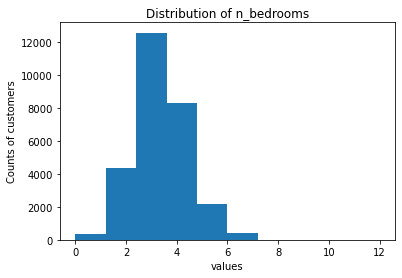

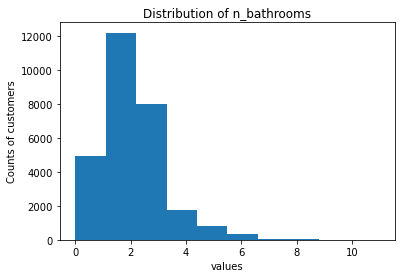

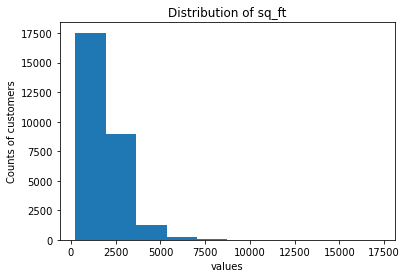

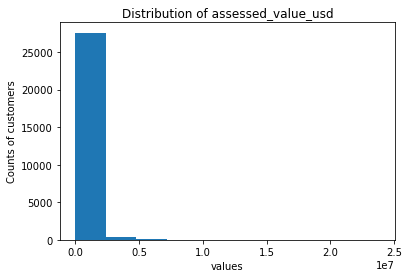

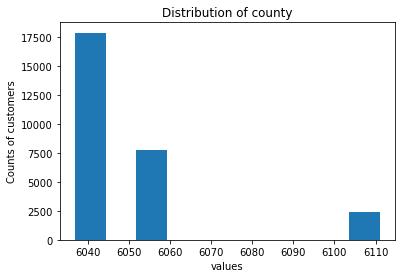

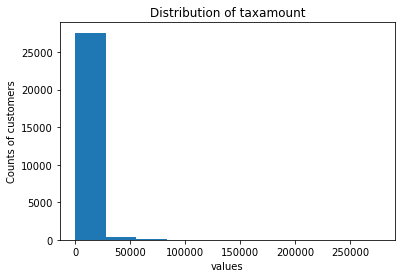

In [22]:
#using my function
p.distribution(df)

**Because all my features are continous i decided to do  boxplot so I can see outliers**

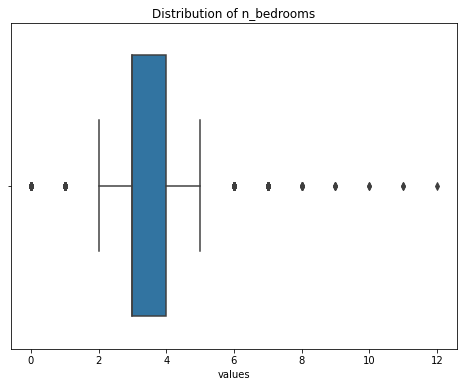

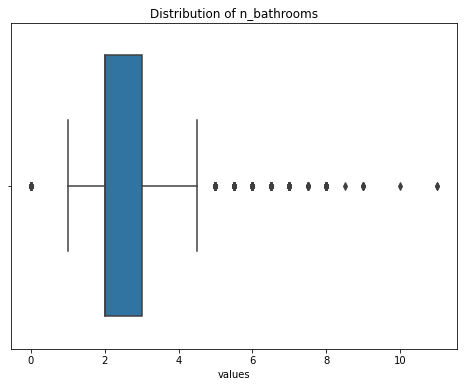

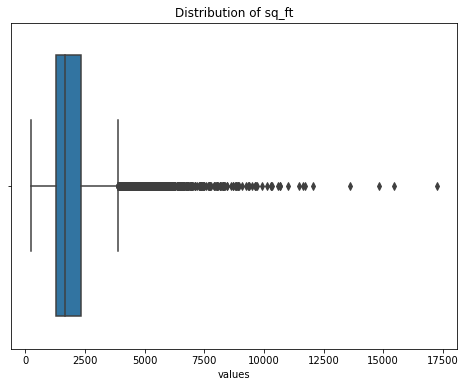

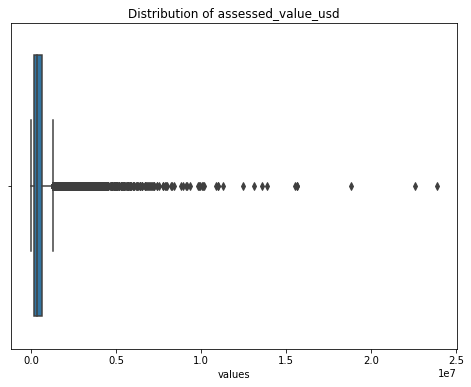

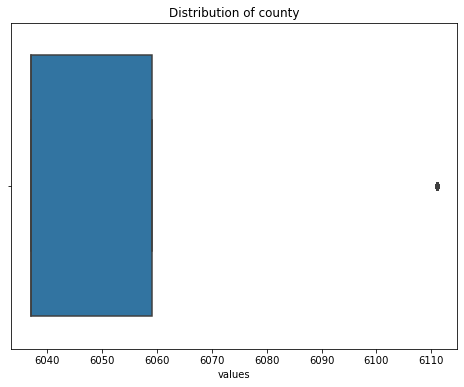

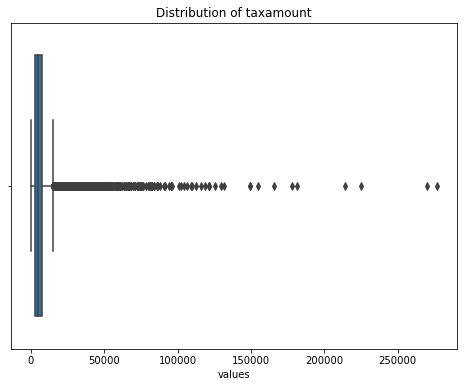

In [23]:
#using my function
p.distribution_boxplot(df)

**Takeaways** 
-  bathrooms , bedrooms, sq_dt and usd_valure are continous.
- we can see outliers in all of features
- target is  usd_value


**I will create a new df that has only parcelid, assessed_value_usd, taxamount, county**

In [24]:
# I will use this df for the distribution of tax rates for each county.
df_county = df.drop(columns = ['n_bedrooms','n_bathrooms','sq_ft'])
df_county.head()

,parcelid,assessed_value_usd,county,taxamount
0,11721753,205123.0,6037,2627.48
1,11289917,136104.0,6037,2319.90
2,11705026,35606.0,6037,543.69
3,14269464,880456.0,6059,9819.72
4,11446756,107110.0,6037,1399.27


In [25]:
#drop the columns ['county', 'taxamount'], so I can continue to explore and create my model
df = df.drop(columns = ['county', 'taxamount'])
df.head()

,parcelid,n_bedrooms,n_bathrooms,sq_ft,assessed_value_usd
0,11721753,3.0,2.0,1316.0,205123.0
1,11289917,3.0,2.0,1458.0,136104.0
2,11705026,2.0,1.0,1421.0,35606.0
3,14269464,4.0,3.0,2541.0,880456.0
4,11446756,3.0,2.0,1491.0,107110.0


### split train, validate, test

In [26]:
#use my function to split
train, validate, test = p.split_data(df)

train -> (15731, 5)
validate -> (6742, 5)
test -> (5619, 5)


**Split Data**

- Data is split into train (50%), validate (30%), and test (20%).
- random_state=123

In [27]:
#split my features from my target
X_train, y_train, X_validate, y_validate, X_test, y_test = p.split_Xy(train,validate,test, 'assessed_value_usd')

X_train -> (15731, 4)               y_train->(15731,)
X_validate -> (6742, 4)         y_validate->(6742,) 
X_test -> (5619, 4)                  y_test>(5619,)


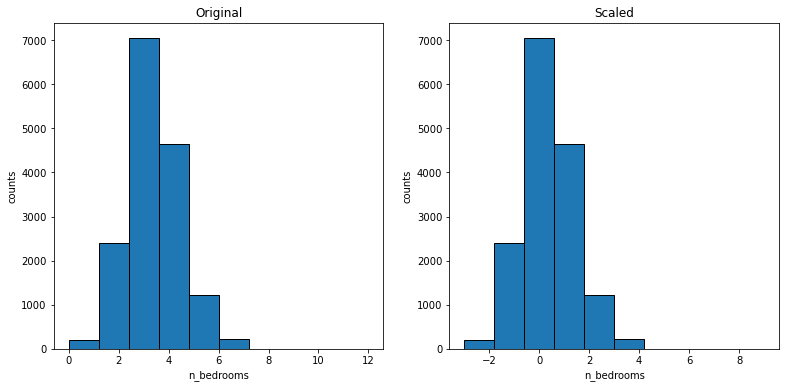

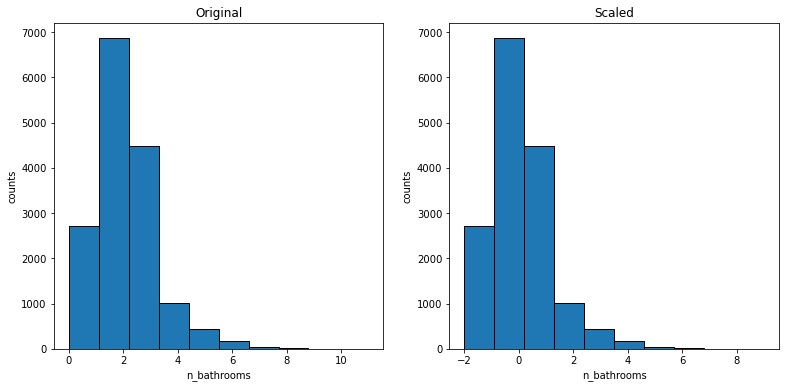

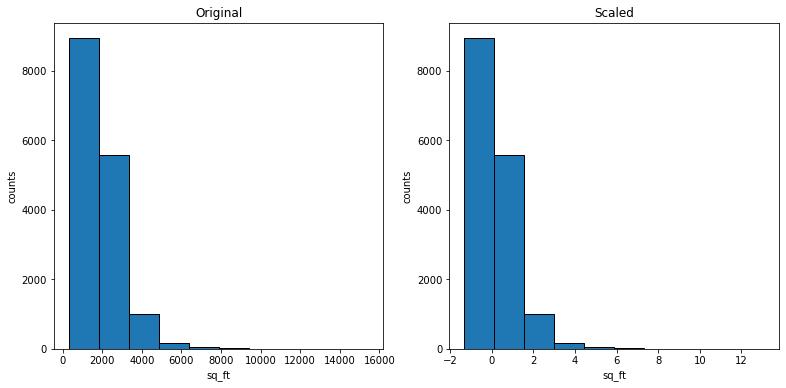

In [28]:
#Scale our data
X_train_scaled, X_validate_scaled, X_test_scaled = p.scaled_df(X_train, X_validate, X_test, RobustScaler())

**takeaways**
- I use Robust Scaler that uses parameters that are more robust to outliers,  because  bathrooms , bedrooms, and sq_dt have outliers.

__________________________

# Explore


before Exploration this is what I think:



- The variables that can influence the value of home are square feet, and number of bedrooms and at last number of bathrooms. 
- square feet, and number of bedrooms  can have an influence no matter where the property located.

-  other factors can influence the value of a home such as zip code, year built,  school district.

In [29]:
#  I want to start exploring  my target

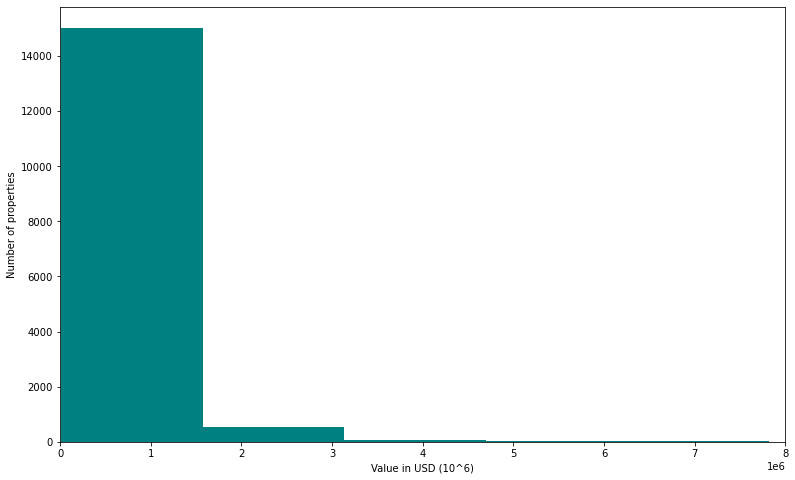

In [30]:
plt.figure(figsize=(13, 8))
train['assessed_value_usd'].hist(grid=False, color = 'teal')
plt.xlabel("Value in USD (10^6)")
plt.ylabel("Number of properties")                               
plt.xlim(0,.8 *(10**7))
plt.show() 

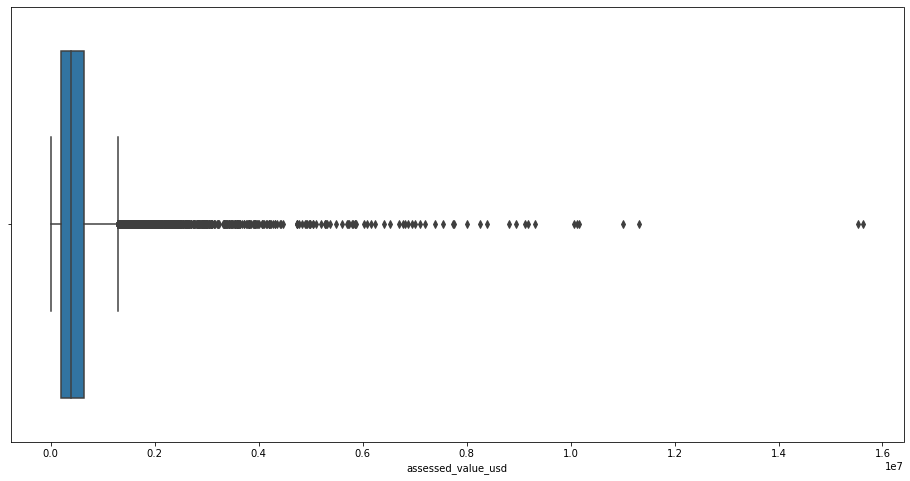

In [31]:
#here we van see the outliers
plt.figure(figsize=(16, 8))
sns.boxplot(train['assessed_value_usd'])
plt.show()

In [32]:
# I create a new df so it has target and scaled features

In [33]:
train_scaled = pd.concat([X_train_scaled, pd.DataFrame( {'assessed_valure_usd': y_train}) ], axis= 1 )

In [34]:
train_scaled.head()

,n_bedrooms,n_bathrooms,sq_ft,assessed_valure_usd
26382,0.0,0.5,-0.288023,225691.0
8272,1.0,2.5,1.895437,824059.0
15498,0.0,0.0,0.329848,161841.0
13792,2.0,1.0,-0.157795,345429.0
18279,-1.0,-1.0,-0.095057,477466.0


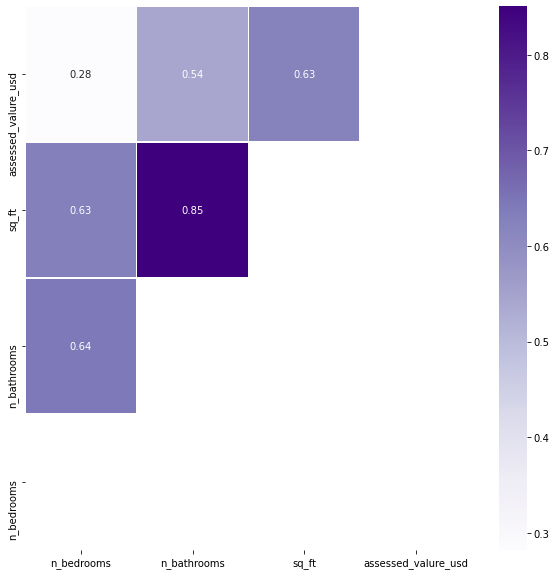

In [35]:
#let see the correlation
plt.figure(figsize=(10,10))
e.heatmap(train_scaled)

Features in order with more correlation with the target:

    - 1. sq_ft
    - 2. n_bathrooms
    - 3. n_bedrooms
    
-  Strong correlation between n_bathrooms and sq_ft

<Figure size 1296x1152 with 0 Axes>

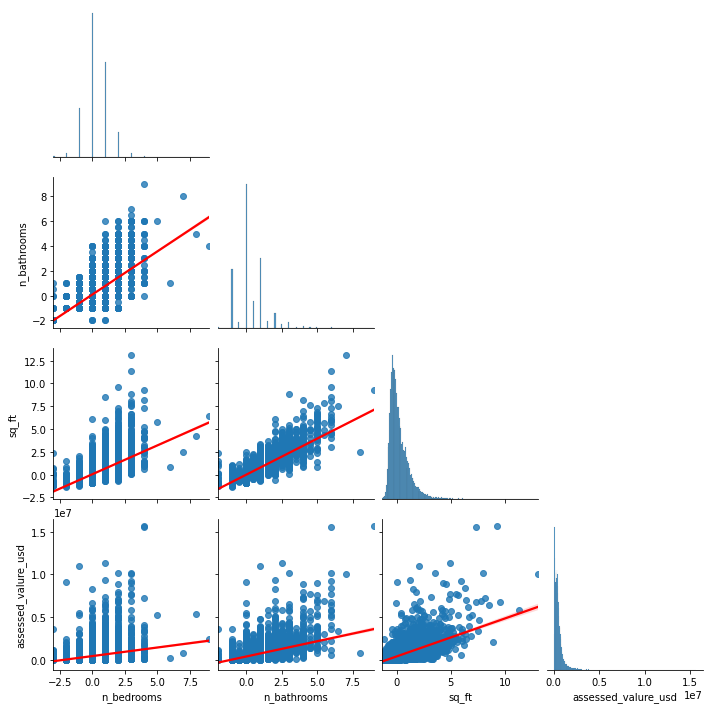

In [36]:
#as all my columns are continuous I use pairplot.
plt.figure(figsize=(18,16))
sns.pairplot(train_scaled, kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()

**Takeaways**

we can vizualize the correlation between features and features with our target(assessed_value_usd)
- sq_ft has more correlation with our target
- sq_ft has higher correlation n_bathrooms

## Statistical Tests

### - T-test

 **Is any diference in  the average of assessed_value_usd  for 2   bedrooms  vs 3 o bedrooms properties?**


- 𝐻𝑜 : There is no difference in  the average of assessed_value_usd  for the properties with  3  bedrooms  vs 2 bedrooms
- 𝐻𝑎 : There is significant  difference in  the average of assessed_value_usd  for the properties with  3  bedrooms  vs 2 bedrooms



- **continous** = assessed_value_usd 
- **categorical** = 2 groups ( bedroom_2, bedroom_3)  
- **continous vs categorical** = 2-tailed (significantly different) , 2-sample (comparing 2 groups) t-test.

1. Set Significance Level: $\alpha = .05$ (in other words Confidence level is 0.95)

2. Verify Assumptions:

    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
    - Independent samples
    - Equal Variances (or set method argument to False when not)
3. Compute test statistic and probability (t-statistic & p-value) using stats.ttest_ind

In [37]:
# Set Significance Level
alpha = 0.05

In [38]:
train_scaled.head()

,n_bedrooms,n_bathrooms,sq_ft,assessed_valure_usd
26382,0.0,0.5,-0.288023,225691.0
8272,1.0,2.5,1.895437,824059.0
15498,0.0,0.0,0.329848,161841.0
13792,2.0,1.0,-0.157795,345429.0
18279,-1.0,-1.0,-0.095057,477466.0


In [39]:
#create my groups
bedroom_2 = train_scaled[train_scaled.n_bedrooms == 2].assessed_valure_usd
bedroom_3 = train_scaled[train_scaled.n_bedrooms ==3 ].assessed_valure_usd

In [40]:
#Normal Distribution
bedroom_2.shape, bedroom_3.shape

((1222,), (183,))

In [41]:
# Equal Variances (or set method argument to False when not)
bedroom_2.var(), bedroom_3.var()

(1019661486481.7203, 3379921615882.199)

In [42]:
#Compute Test Statistic
t, p = stats.ttest_ind(bedroom_2, bedroom_3, equal_var = False)
t,p

(-3.7034584268582034, 0.0002755138534629395)

In [43]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


t is negative that means the average in assessed_value_usd is for 3 bedrooms is  greater  than 2 bedrooms

In [44]:
print('Average  assessed value  for 2 bedrooms is : $ ',round( bedroom_2.mean(), 2))
print('Average  assessed value  for 3 bedrooms is : $', round (bedroom_3.mean(), 2))

Average  assessed value  for 2 bedrooms is : $  964110.46
Average  assessed value  for 3 bedrooms is : $ 1478663.83


### - Correlation

Are bathrooms and bedrooms linearly correlated? 
- 𝐻𝑜 : There is not a linear correlation between number of bathrooms and number of bedrooms for a property.
- 𝐻𝑎 : There is a linear correlation between number of bathrooms and number of bedrooms for a property.


In [45]:
r, p = stats.pearsonr(train_scaled.n_bathrooms, train_scaled.n_bedrooms)
r, p

(0.6440763653445709, 0.0)

In [46]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Text(-3, 8, 'Pearson r:0.6441\n p-stat: 0.00')

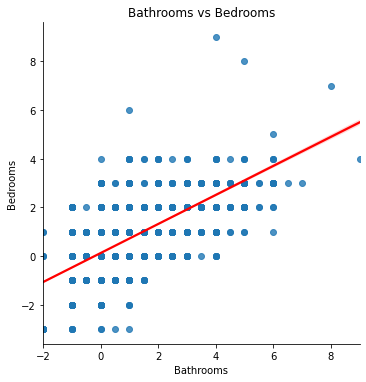

In [47]:

sns.lmplot(x = 'n_bathrooms', y= 'n_bedrooms', data = train_scaled, line_kws={'color': 'red'})
plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')
plt.title('Bathrooms vs Bedrooms')
plt.annotate(f'Pearson r:{r:.4f}\n p-stat: {p:.2f}', xy =(-3, 8))

**Takeaways**
- What independent variables are correlated with assessed_value_usd?
    - my surprise is bathrooms have higher correlation with our target than bedrooms
    - **sq_ft  looks to be the best predictor of our target variable**

- Which independent variables are correlated with other independent variables?
    - bathrooms and bedrooms are  correlated (if bedrooms increase  also bathrooms tend to increase)
    - bathroom and sq_ft have stronger correlation

______________________

# Modeling

### - Feature Engineering


    - SelectkBest

In [48]:
#using my function for SelectkBest
top_sb =m.select_kbest(X_train_scaled, y_train, 2)

The top 2 selected feautures based on the SelectKBest class are: ['n_bathrooms', 'sq_ft']


In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
#using my function for RFE
top_rfe = m.select_rfe(X_train_scaled, y_train, 2,LinearRegression() )

The top 2 selected feautures based on the the RFE class class are: ['n_bedrooms', 'sq_ft']
n_bedrooms     1
sq_ft          1
n_bathrooms    2
dtype: int64


In [51]:
y_train.shape

(15731,)

### - Modeling

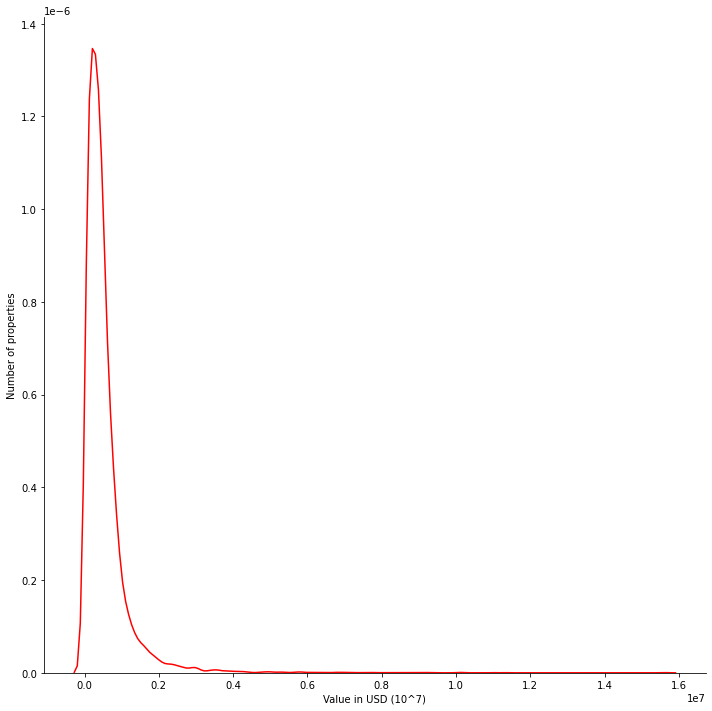

In [52]:
#plot our target
sns.displot(y_train,  kind="kde", height =10 ,aspect =1, color = 'red')
plt.xlabel("Value in USD (10^7)")
plt.ylabel("Number of properties")
plt.show()

In [53]:
#conver y_train y _ validate to df
y_train = pd.DataFrame( {'actual': y_train})
y_validate = pd.DataFrame( {'actual': y_validate})
y_test = pd.DataFrame( {'actual': y_test})

**Baseline**

I wil check mean and median to calculate my baseline and I will select the one that has better rmse 

In [54]:
y_train.mean(), y_train.median()

(actual    531178.103553
 dtype: float64,
 actual    381698.0
 dtype: float64)

In [55]:
#create baseline using mean (I'm using my function to calculate rmse)
tra_m = eval.baseline_errors(y_train, 'actual', 'mean')
tra_m['rmse']

659828.8100870318

In [56]:
#let's calculate baseline in validate
val_m = eval.baseline_errors(y_validate, 'actual', 'mean')
val_m['rmse']

719836.6015413993

In [57]:
#create baseline using median
tra = eval.baseline_errors(y_train, 'actual', 'median')
tra['rmse']

676548.8600088181

In [58]:
#using median in validate
val = eval.baseline_errors(y_validate, 'actual', 'median')
val['rmse']

735456.3529466464

**I will select mean for my baseline because has the less rmse**

In [59]:
y_train.head()

,actual,yhat_baseline_mean,yhat_baseline_median
26382,225691.0,531178.103553,381698.0
8272,824059.0,531178.103553,381698.0
15498,161841.0,531178.103553,381698.0
13792,345429.0,531178.103553,381698.0
18279,477466.0,531178.103553,381698.0


In [60]:
metric_df = pd.DataFrame(data = [{
    'model': 'mean_baseline',
    'rmse_train' : tra['rmse'],
    'rmse_validate': val_m['rmse'],
    'rmse_difference' : abs(round(tra['rmse'] - val_m['rmse'], 4)),
    'r^2_validate' : val_m['r2']}])

In [61]:
metric_df

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,676548.860009,719836.601541,43287.7415,0.0


#### Model1: LinearRegression (OLS)

In [62]:
#using selected features with selectk best
ols_sb = m.create_model(X_train_scaled[top_sb], y_train, 'actual', LinearRegression(normalize=True), 'modelOLS' )
ols_sb['rmse']

514223.070384048

In [63]:
#I will calcaulate validate with top_rfe 
ols_val = m.create_model(X_validate_scaled[top_sb], y_validate, 'actual', LinearRegression(normalize=True), 'modelOLS' )
ols_val['rmse']

576425.0845282308

In [64]:
#using my function for RFE
top_rfe = m.select_rfe(X_train_scaled, y_train, 2,LinearRegression(normalize=True) )


The top 2 selected feautures based on the the RFE class class are: ['n_bedrooms', 'sq_ft']
n_bedrooms     1
sq_ft          1
n_bathrooms    2
dtype: int64


In [65]:
ols_rfe = m.create_model(X_train_scaled[top_rfe], y_train, 'actual', LinearRegression(normalize=True), 'modelOLS' )
ols_rfe['rmse']

505329.6068567074

In [66]:
#I will calcaulate validate with top_rfe 
ols_val = m.create_model(X_validate_scaled[top_rfe], y_validate, 'actual', LinearRegression(normalize=True), 'modelOLS' )

In [67]:
print('Train rmse:  ',ols_rfe['rmse'])
print('validate rmse', ols_val['rmse'])

Train rmse:   505329.6068567074
validate rmse 569058.3148635708


In [68]:
metric_df = metric_df.append(
    {
    'model': 'ols',
    'rmse_train': ols_rfe['rmse'],    
    'rmse_validate': ols_val['rmse'],
    'rmse_difference' : abs(round(ols_rfe['rmse'] - ols_val['rmse'], 4)),
    'r^2_validate' : ols_val['r2']}, ignore_index=True)

### LassoLars

In [69]:
#using selected features with selectk best
lasso_sb = m.create_model(X_train_scaled[top_sb], y_train, 'actual', LassoLars(alpha=1), 'model_lasso' )
lasso_sb['rmse']

514223.0869124893

In [70]:
#using my function for RFE
top_rfe = m.select_rfe(X_train_scaled, y_train, 2,  LassoLars(alpha=1) )

The top 2 selected feautures based on the the RFE class class are: ['n_bedrooms', 'sq_ft']
n_bedrooms     1
sq_ft          1
n_bathrooms    2
dtype: int64


In [71]:
lasso_rfe = m.create_model(X_train_scaled[top_rfe], y_train, 'actual', LassoLars(alpha=1), 'model_lasso' )
lasso_rfe['rmse']

505329.69106156

In [72]:
#validate
lasso_val = m.create_model(X_validate_scaled[top_rfe], y_validate, 'actual', LassoLars(alpha=1), 'model_lasso' )

In [73]:
print('Train rmse:  ',lasso_rfe['rmse'])
print('validate rmse', lasso_val['rmse'])

Train rmse:   505329.69106156
validate rmse 569058.3467468194


In [74]:
metric_df = metric_df.append(
    {
    'model': 'lasso',
    'rmse_train': lasso_rfe['rmse'],
    'rmse_validate': lasso_val['rmse'],
    'rmse_difference' :abs( round(lasso_rfe['rmse'] - lasso_val['rmse'], 4)),
    'r^2_validate' : lasso_val['r2']}, ignore_index = True)



### TweedieRegressor (GLM)


In [75]:
#train
glm_train = m.create_model(X_train_scaled[top_rfe], y_train, 
                           'actual', TweedieRegressor(power=0, alpha=0), 'model_glm' )

In [76]:
#validate
glm_val = m.create_model(X_validate_scaled[top_rfe], y_validate, 
                         'actual', TweedieRegressor(power=0, alpha=0), 'model_glm' )



In [77]:
print('Train rmse:  ',glm_train['rmse'])
print('validate rmse', glm_val['rmse'])

Train rmse:   505329.6068567074
validate rmse 569058.3148635708


In [78]:
metric_df = metric_df.append(
    {
    'model': 'glm',
    'rmse_train' : glm_train['rmse'],   
    'rmse_validate': glm_val['rmse'],
    'rmse_difference' : abs(round(glm_train['rmse'] - glm_val['rmse'], 4)),
    'r^2_validate' : glm_val['r2']}, ignore_index = True)

In [79]:
metric_df

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,676548.860009,719836.601541,43287.7415,0.000000
1,ols,505329.606857,569058.314864,63728.7080,0.375049
2,lasso,505329.691062,569058.346747,63728.6557,0.374850
3,glm,505329.606857,569058.314864,63728.7080,0.375049


### Polynomial Regression

In [80]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree = 21) 

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [81]:

#train
pol_reg_train =  m.create_model(X_train_degree2, y_train, 
                                'actual', LinearRegression(normalize=True), 'model_polreg' )

In [82]:
#validate
pol_reg_val =  m.create_model(X_validate_degree2, 
                              y_validate, 'actual',LinearRegression(normalize=True), 'model_polreg' )

In [83]:
print('Train rmse:  ',pol_reg_train['rmse'])
print('validate rmse', pol_reg_val['rmse'])

Train rmse:   413107.37394136115
validate rmse 420844.93456983095


In [84]:
metric_df = metric_df.append(
    {
    'model': 'pol_reg',
    'rmse_train': pol_reg_train['rmse'],
    'rmse_validate': pol_reg_val['rmse'],
    'rmse_difference' : abs(round(pol_reg_train['rmse'] - pol_reg_val['rmse'], 4)),
    'r^2_validate' : pol_reg_val['r2']},  ignore_index = True)

In [85]:
metric_df

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,676548.860009,719836.601541,43287.7415,0.000000
1,ols,505329.606857,569058.314864,63728.7080,0.375049
2,lasso,505329.691062,569058.346747,63728.6557,0.374850
3,glm,505329.606857,569058.314864,63728.7080,0.375049
4,pol_reg,413107.373941,420844.934570,7737.5606,0.673252


**Takeaway**
I was changing degree argument . I started in 2 and was incrementing.If I have more time I can create a function

In [86]:
#I use this function that gives me a report based on metric_df
m.report (metric_df)

These are the models that perform better than our baseline rmse: 719836.6015413993


,model,rmse_validate
1,ols,569058.314864
2,lasso,569058.346747
3,glm,569058.314864
4,pol_reg,420844.934570


-----------------------------------------------------------------------------------------------
   ********** The model with the less  rmse_validate  is pol_reg  rmse:420844.93 **********             
-----------------------------------------------------------------------------------------------
 
The model with r^2 validate closer to 1 is  pol_reg


,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,676548.860009,719836.601541,43287.7415,0.000000
1,ols,505329.606857,569058.314864,63728.7080,0.375049
2,lasso,505329.691062,569058.346747,63728.6557,0.374850
3,glm,505329.606857,569058.314864,63728.7080,0.375049
4,pol_reg,413107.373941,420844.934570,7737.5606,0.673252


### Test the best model 

In [87]:
# I'm going to test my best model

In [88]:
#use my function to create and calculate the metrics
pol_reg_test =  m.create_model(X_test_degree2, 
                              y_test, 'actual',LinearRegression(normalize=True), 'model_polreg' )

In [89]:
metric_df

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,676548.860009,719836.601541,43287.7415,0.000000
1,ols,505329.606857,569058.314864,63728.7080,0.375049
2,lasso,505329.691062,569058.346747,63728.6557,0.374850
3,glm,505329.606857,569058.314864,63728.7080,0.375049
4,pol_reg,413107.373941,420844.934570,7737.5606,0.673252


In [90]:
#I;m goung to create a new table only with my baseline and my best model
best_model = metric_df.drop([1,2,3], axis= 0)
best_model

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,676548.860009,719836.601541,43287.7415,0.000000
4,pol_reg,413107.373941,420844.934570,7737.5606,0.673252


In [91]:
#add the resutl of test
best_model[' rmse_test'] =  pol_reg_test['rmse']
best_model.iloc[0,5] = 0

In [92]:
best_model

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate,rmse_test
0,mean_baseline,676548.860009,719836.601541,43287.7415,0.000000,0.000000
4,pol_reg,413107.373941,420844.934570,7737.5606,0.673252,378440.269668


**takeaweays**
- I used mean for my baseline 
- my model that used PolynomialFeatures(degree = 21)  and features (n_berooms, n_bathrooms, sq_ft) was my best model.
- RMSE for baseline is 719,836.601 usd
- RMSE for best model in test is 378,440.27 usd
- my model predict 52.57 % less error than my baseline

### Best Model Vizualization

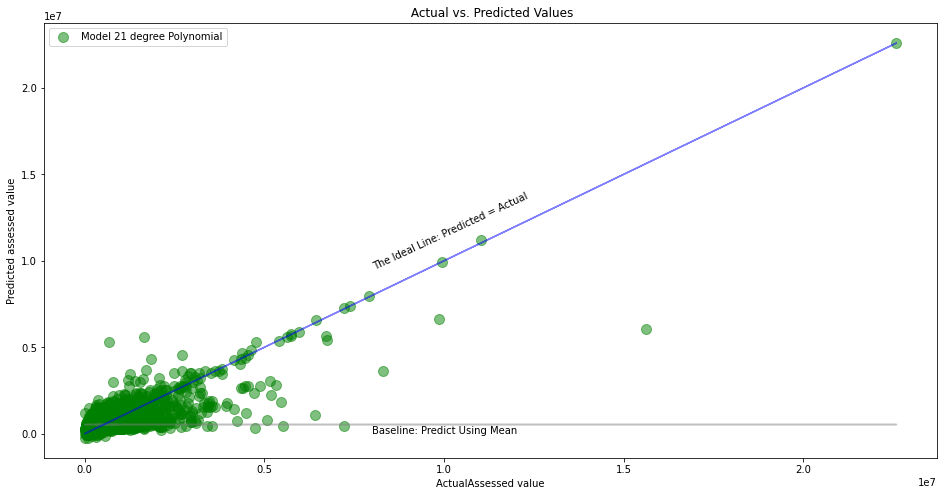

In [93]:
plt.figure(figsize=(16,8))
plt.plot(y_validate.actual, y_validate.yhat_baseline_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", ( 8000_000, 1))
plt.plot(y_validate.actual, y_validate.actual, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.8 *(10**7), .95 *(10**7)), rotation=25)
#these are my oder models if I want to see them too
#plt.scatter(y_validate.actual, y_validate.modelOLS, 
#           alpha=.5, color="red", s=100, label="Model: LinearRegression")
#plt.scatter(y_validate.actual, y_validate.model_lasso, 
#            alpha=.5, color="blue", s=100, label="Model: LASSO")
#plt.scatter(y_validate.actual, y_validate.model_glm, 
#            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.actual, y_validate.model_polreg, 
            alpha=.5, color="green", s=100, label="Model 21 degree Polynomial")
plt.legend()
plt.xlabel("ActualAssessed value")
plt.ylabel("Predicted assessed value")
plt.yscale(value = 'linear')
plt.title(" Actual vs. Predicted Values")

plt.show()

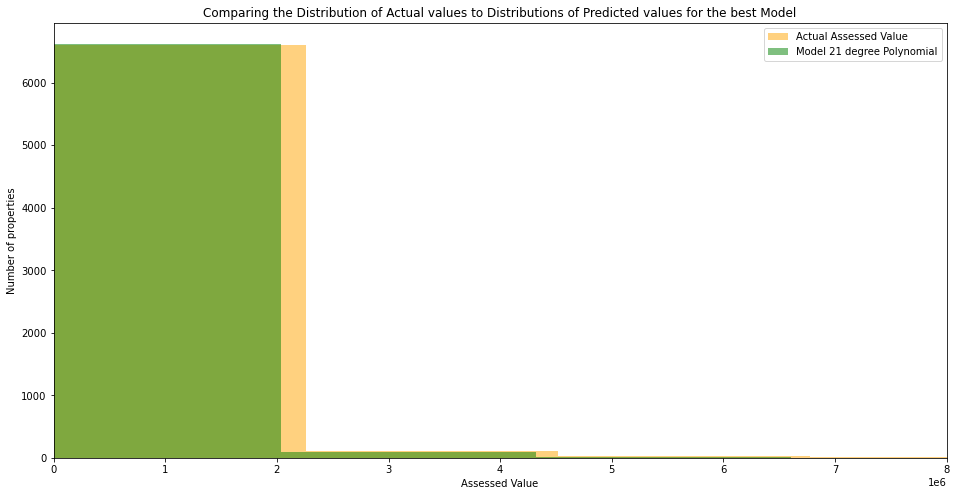

In [94]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.actual, color='ORANGE', alpha=.5, label="Actual Assessed Value")
#plt.hist(y_validate.G3_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
#plt.hist(y_validate.G3_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.model_polreg, color='green', alpha=.5, label="Model 21 degree Polynomial")
plt.xlabel("Assessed Value")
plt.ylabel("Number of properties")
plt.title("Comparing the Distribution of Actual values to Distributions of Predicted values for the best Model")
plt.legend()

plt.xlim(0,.8 *(10**7))
plt.show()  
plt.show()

### Residuals

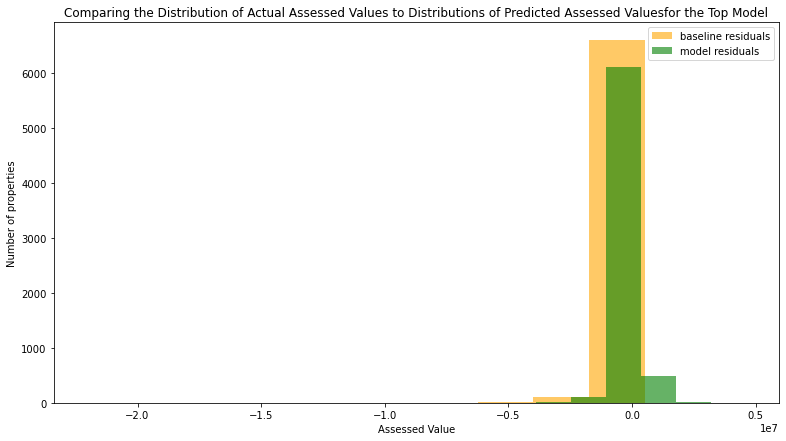

In [95]:
eval.plot_residuals(y_validate, 'actual', 'model_polreg')


________________

### with more time I would drop the outliers in my target, I would add more features as year built, lot size, number of stories,

________________________

# Distribution of tax rates for each county

In [96]:
# I'm going to use my df that I created before the split

In [97]:
df_county.head()

,parcelid,assessed_value_usd,county,taxamount
0,11721753,205123.0,6037,2627.48
1,11289917,136104.0,6037,2319.90
2,11705026,35606.0,6037,543.69
3,14269464,880456.0,6059,9819.72
4,11446756,107110.0,6037,1399.27


In [98]:
# calculate the tax rate
df_county['tax_rate']= df_county['taxamount']/ df_county['assessed_value_usd'] 

In [99]:
df_county.head()

,parcelid,assessed_value_usd,county,taxamount,tax_rate
0,11721753,205123.0,6037,2627.48,0.012809
1,11289917,136104.0,6037,2319.90,0.017045
2,11705026,35606.0,6037,543.69,0.015270
3,14269464,880456.0,6059,9819.72,0.011153
4,11446756,107110.0,6037,1399.27,0.013064


In [100]:
#lets see counties
df_county['county'].value_counts()

6037    17913
6059     7736
6111     2443
Name: county, dtype: int64

- county # 6037 ----->		Los Angeles
- county # 6059 ----->		Orange
- county # 6111 ----->		Ventura

In [101]:
# add a new column that has names

In [102]:
counties= {
    6037: "Los Angeles",
    6059: "Orange",
    6111: "Ventura"
    }

In [103]:
df_county['county_name'] = df_county.county.map(counties)

In [104]:
df_county.head()

,parcelid,assessed_value_usd,county,taxamount,tax_rate,county_name
0,11721753,205123.0,6037,2627.48,0.012809,Los Angeles
1,11289917,136104.0,6037,2319.90,0.017045,Los Angeles
2,11705026,35606.0,6037,543.69,0.015270,Los Angeles
3,14269464,880456.0,6059,9819.72,0.011153,Orange
4,11446756,107110.0,6037,1399.27,0.013064,Los Angeles


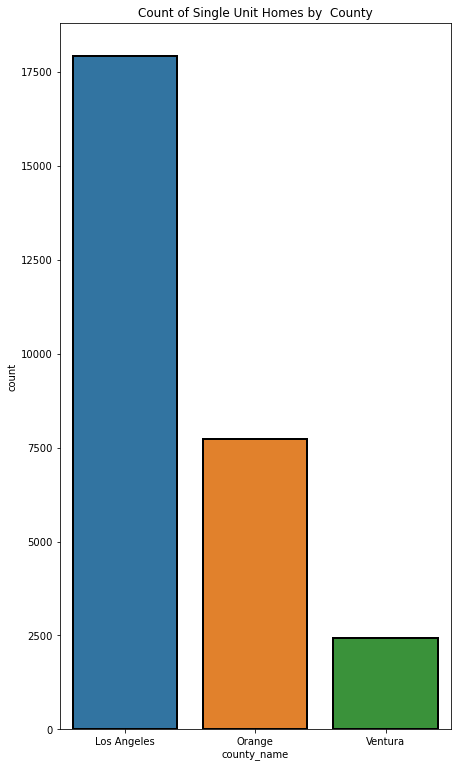

In [105]:
# visualize the number of single unit homes for each county
plt.rc("figure", figsize= (7,13))
sns.countplot(x = 'county_name', data=df_county, palette= 'tab10', ec='black', linewidth=2)
plt.title('Count of Single Unit Homes by  County')
plt.show()

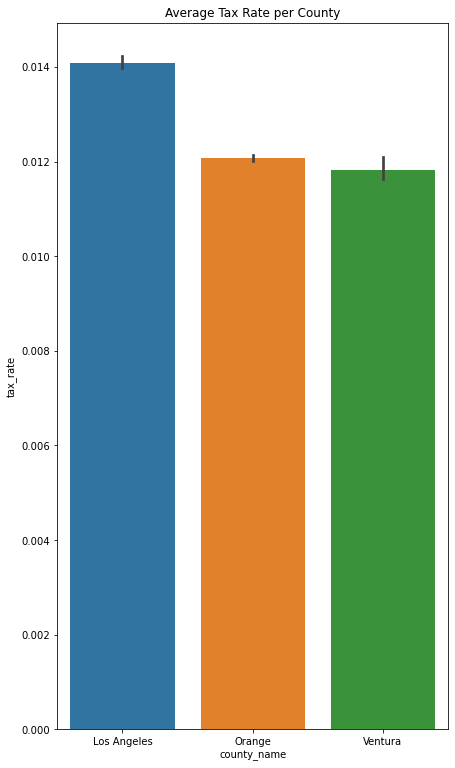

In [106]:
# visualize average tax rate for each county
sns.barplot(data=df_county, y='tax_rate', x='county_name', palette = 'tab10')
plt.title('Average Tax Rate per County')
plt.show()

In [107]:
#crete a function that plots each county

In [108]:
def plot_dis (df_county):
    
    #make a dictionary 
    counties= {
    6037: "Los Angeles",
    6059: "Orange",
    6111: "Ventura"
    }
    #get the counties
    f = df_county['county'].value_counts()
    cols = list(f.index)
    
    #plot each county
    for col in cols :
        #get the name of the county
        name = counties[col]
        print (f'                         ********** {name} County ********** ')
        print('')
        #get the taxrte for that county
        zipc =  df_county[['tax_rate']][df_county['county']== col]
        df_r = pd.DataFrame(zipc.describe().T)
        display (HTML(df_r.to_html()))
        plt.figure(figsize=(13,8))
        sns.distplot(zipc, bins = 50, color = 'purple')
        plt.xlim(0,0.1)
        plt.ylabel('count')
        plt.title(f'2017 Tax Distribution for {name} county')
        plt.show()
        print('--------------------------------------------------------------------------------------------')
        
    return


                         ********** Los Angeles County ********** 



,count,mean,std,min,25%,50%,75%,max
tax_rate,17913.0,0.014089,0.00866,0.000857,0.012123,0.012634,0.01431,0.81649


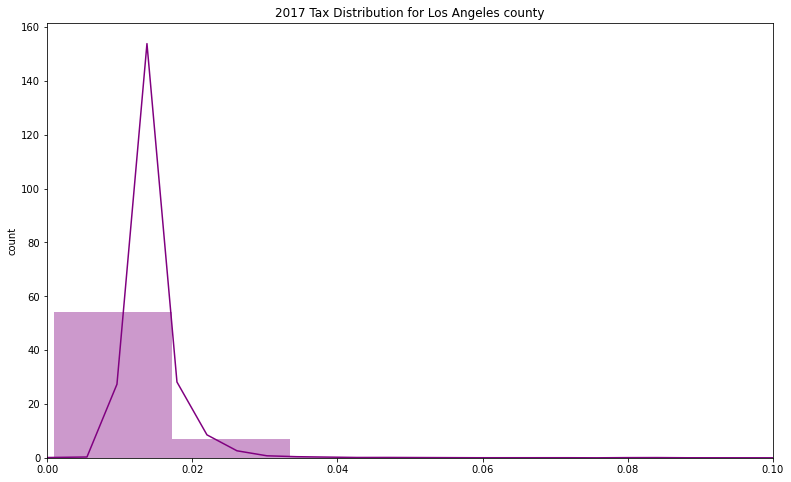

--------------------------------------------------------------------------------------------
                         ********** Orange County ********** 



,count,mean,std,min,25%,50%,75%,max
tax_rate,7736.0,0.012074,0.002777,0.001157,0.010624,0.011532,0.012547,0.10735


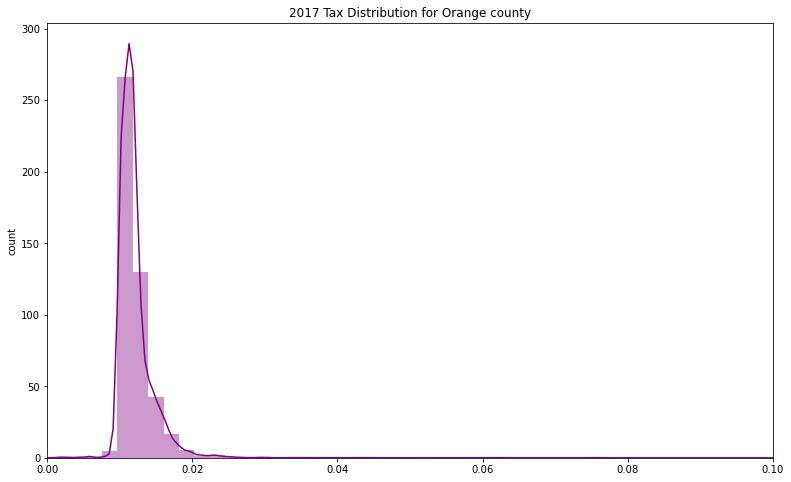

--------------------------------------------------------------------------------------------
                         ********** Ventura County ********** 



,count,mean,std,min,25%,50%,75%,max
tax_rate,2443.0,0.011817,0.006155,0.000094,0.010732,0.011245,0.011886,0.294865


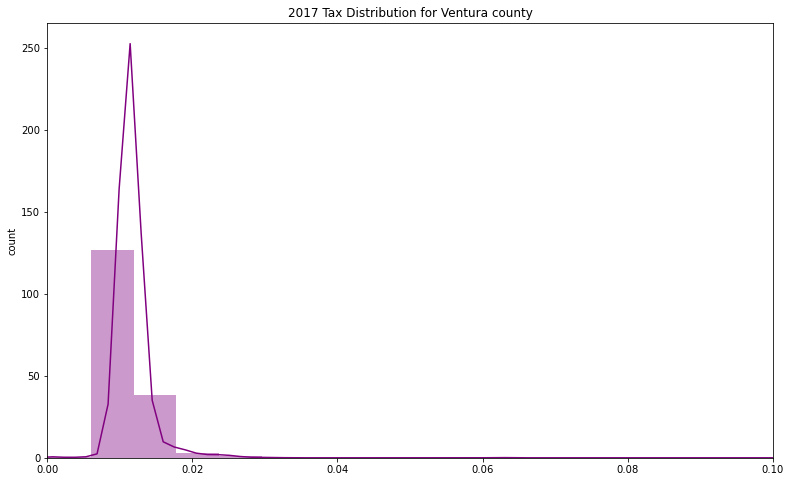

--------------------------------------------------------------------------------------------


In [109]:
plot_dis(df_county)

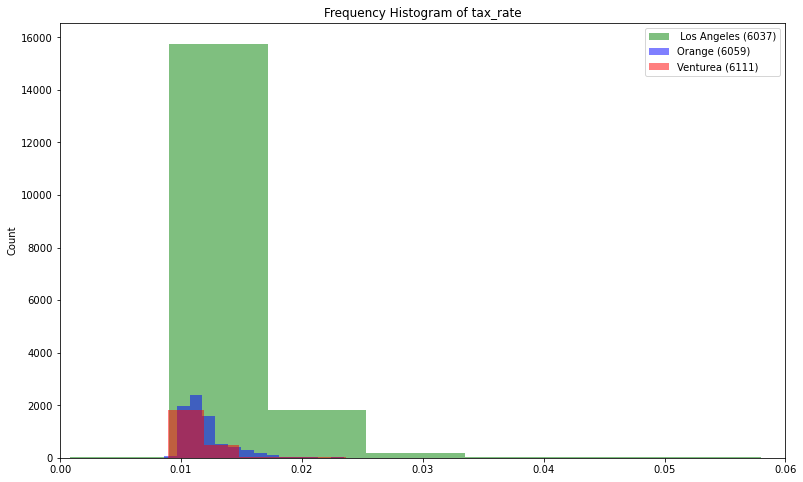

In [110]:
#plot all counties
x1 = df_county.loc[df_county.county==6037, 'tax_rate']
x2 = df_county.loc[df_county.county==6059, 'tax_rate']
x3 = df_county.loc[df_county.county==6111, 'tax_rate']

kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(13,8))
plt.hist(x1, **kwargs, color='g', label=' Los Angeles (6037)')
plt.hist(x2, **kwargs, color='b', label= 'Orange (6059)')
plt.hist(x3, **kwargs, color='r', label= 'Venturea (6111)')
plt.gca().set(title='Frequency Histogram of tax_rate', ylabel= 'Count')
plt.xlim(0,.06)
plt.legend();